# WCWH Community Rollout Preparation - BEVO Beacon Design
For the upcoming rollout, we need to ensure proper aspects of the beacon are working correctly.

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Internal Temperature
The purpose of this notebook is to analyze the data from a few beacons to see how the temperature readings change depending on various design considerations.

In [2]:
import os
import sys
sys.path.append('../')

from src.features import build_features
from src.visualization import visualize
from src.reports import make_report

import pandas as pd
import numpy as np

from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

import statsmodels.api as sm

## Design Considerations
The design considerations are as follows and analyzed separately:
1. **As-Is**: The do-nothing approach that might be fine based on the temperatures since not much analysis has been done with the temperature up to this point
2. **Double Fans**: Adding an extra fan might increase the air flow and reduce the amount of hot air trapped in the beacon
3. **Heat Sinks**: Adding heat sinks on the processor might be enough to dissipate the heat effectively
4. **Fans and Heat Sinks**: Of course the final, and most comprehensive idea would be to combine ideas 2 and 3.

In [52]:
class Internal_Temperature_Analysis:
    
    def __init__(self,beacon_list,exp_start_datetime=datetime(2021,1,1,0,0),exp_end_datetime=datetime(2022,1,1,0,0),var="temperature_c"):
        # getting beacon data
        beacon = pd.read_csv("../data/processed/beacon-wcwh_0.csv",index_col=0,parse_dates=True,infer_datetime_format=True)
        self.data = beacon[beacon["beacon"].isin(beacon_list)]
        
        # other important paramters
        self.starting = exp_start_datetime
        self.ending = exp_end_datetime
        self.var = var
    
    def compare_timeseries(self):
        """
        Compares the time series measurements of the list of beacons
        """
        fig, ax = plt.subplots(figsize=(12,6))
        for bb in self.data["beacon"].unique():
            data_by_bb = self.data[self.data["beacon"] == bb]
            ax.plot(data_by_bb.index,data_by_bb[self.var],label=bb)
            
        ax.set_xlim([self.starting,self.ending])
        ax.legend()
        plt.show()
        plt.close()

### As-Is
Here is the analysis from the first analysis.

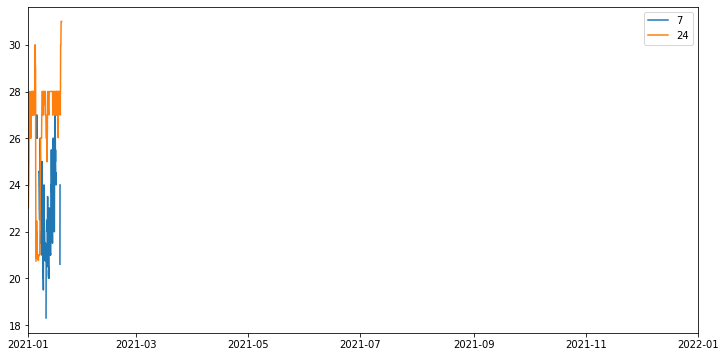

In [53]:
exp1 = Internal_Temperature_Analysis(beacon_list=[7,24])
exp1.compare_timeseries()